# Week 12 - Milestone Two week

# 1. Lesson: no lesson this week.  Milestone Two is due!

# 2. Weekly graph question

Suppose you plot the number visitors to a museum over the seven days of a week; then again the following week.  Can you suggest the advantages and disadvantages of the following two ways of presenting the data?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of visitors')

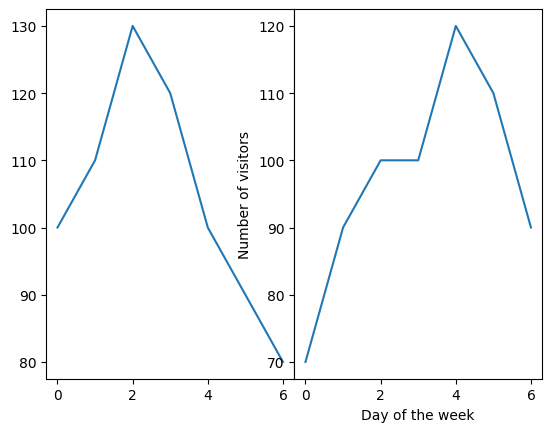

In [17]:
np.random.seed(0)
time_series_0 = np.array([100, 110, 130, 120, 100, 90, 80])
time_series_1 = np.array([70, 90, 100, 100, 120, 110, 90])
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)
plt.subplots_adjust(wspace = 0)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

Text(0, 0.5, 'Number of visitors')

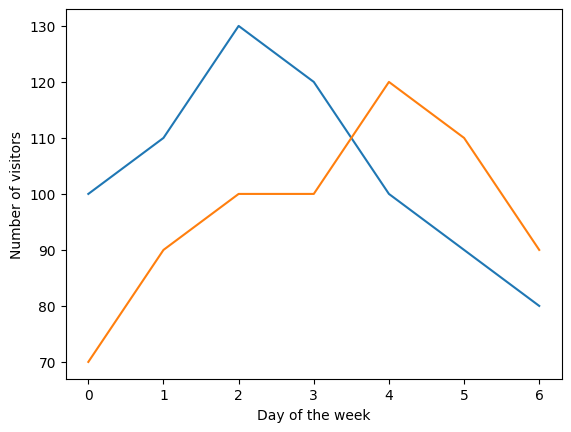

In [18]:
plt.plot(time_series_0)
plt.plot(time_series_1)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

The side-by-side comparison can focus on individual weekly patterns. It can use to identify the trends within each week, but it is hard to directly compare values between weeks. The axes does not match so it may be misleading.

The second way makes it easier to compare the two weeks’ visitor numbers side-by-side for each day. They use the same axes. But it lacks the legend so we dont know which line belongs to which week. If the lines are similar, it can be harder to distinguish

# 3. Working on your datasets

This week, you can work on Milestone Two rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 187-205 of the Storytelling With Data book as best you can. (Chapter Eight). You do not have to get the exact data values right, just the overall look and feel.

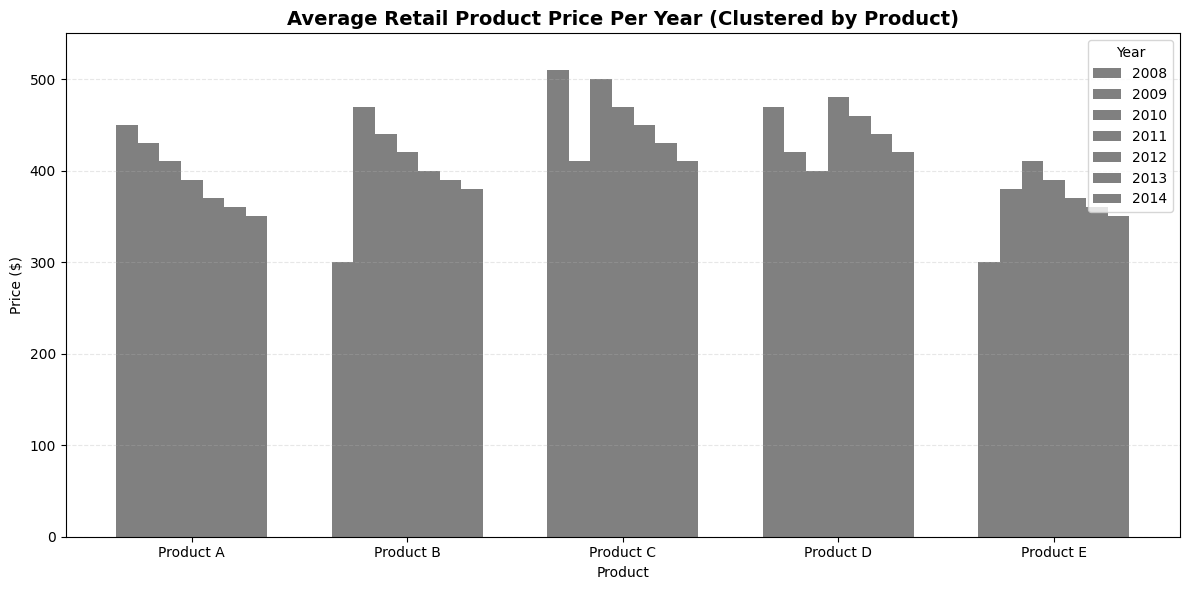

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Products and years
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
years = np.arange(2008, 2015)
n_products = len(products)
n_years = len(years)

# Simulated price data: rows = products, columns = years (index aligned)
price_matrix = np.array([
    [450, 430, 410, 390, 370, 360, 350],   # Product A
    [300, 470, 440, 420, 400, 390, 380],  # Product B
    [510, 410, 500, 470, 450, 430, 410],  # Product C
    [470, 420, 400, 480, 460, 440, 420],  # Product D
    [300, 380, 410, 390, 370, 360, 350]  # Product E
])

# Bar settings
bar_width = 0.1
x = np.arange(n_products)

# Plot
plt.figure(figsize=(12, 6))

for i, year in enumerate(years):
    offsets = x + (i - n_years / 2) * bar_width + bar_width / 2
    bar_values = price_matrix[:, i]
    plt.bar(offsets, bar_values, width=bar_width, label=str(year),color='gray')

# Styling
plt.title("Average Retail Product Price Per Year (Clustered by Product)", fontsize=14, weight='bold')
plt.xlabel("Product")
plt.ylabel("Price ($)")
plt.xticks(x, products)
plt.ylim(0, 550)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
file_path = "homework_4.1.csv"
df = pd.read_csv(file_path)

# Compute average Y difference between Z=1 and Z=0
avg_Y_Z1 = df[df['Z'] == 1]['Y'].mean()
avg_Y_Z0 = df[df['Z'] == 0]['Y'].mean()
avg_Y_diff = avg_Y_Z1 - avg_Y_Z0

# Compute average X difference between Z=1 and Z=0
avg_X_Z1 = df[df['Z'] == 1]['X'].mean()
avg_X_Z0 = df[df['Z'] == 0]['X'].mean()
avg_X_diff = avg_X_Z1 - avg_X_Z0

# Estimate causal effect as ratio of differences
effect_1 = avg_Y_diff / avg_X_diff

# Display the result
print(f"Estimated Effect (Method 1): {effect_1:.4f}")


Estimated Effect (Method 1): 1.5619


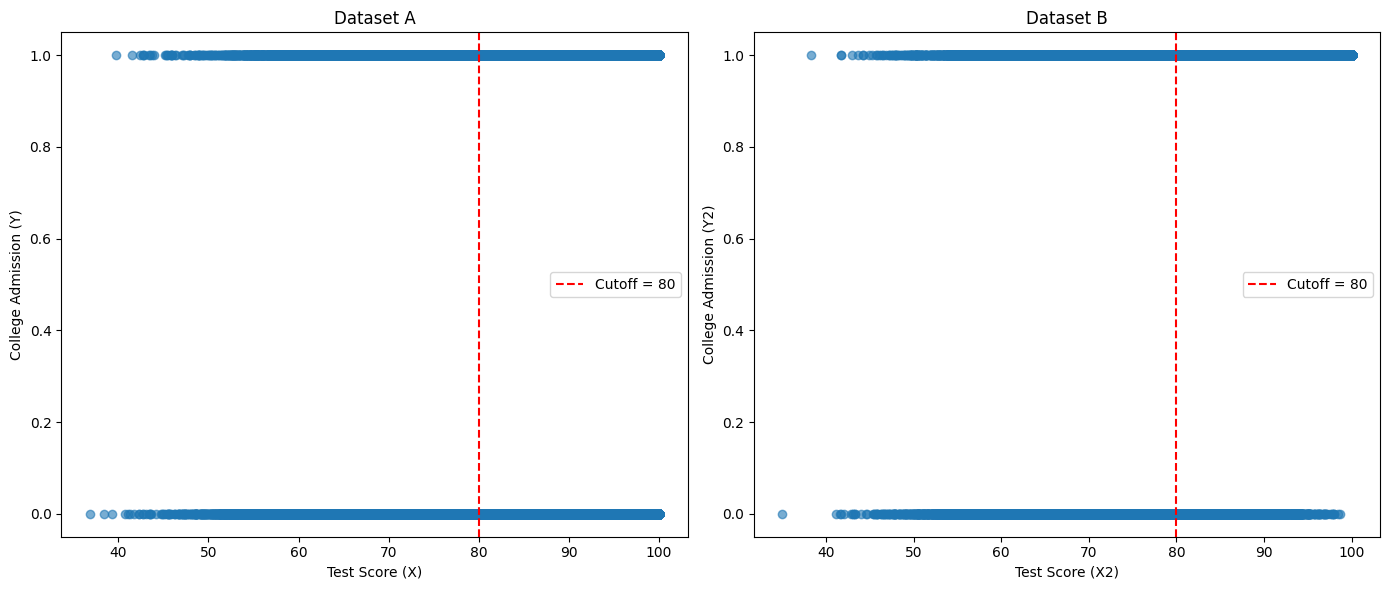

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_a = pd.read_csv("homework_4.2.a.csv")
df_b = pd.read_csv("homework_4.2.b.csv")

# Create scatter plots for both datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset A
axes[0].scatter(df_a['X'], df_a['Y'], alpha=0.6)
axes[0].axvline(x=80, color='red', linestyle='--', label='Cutoff = 80')
axes[0].set_title('Dataset A')
axes[0].set_xlabel('Test Score (X)')
axes[0].set_ylabel('College Admission (Y)')
axes[0].legend()

# Dataset B
axes[1].scatter(df_b['X2'], df_b['Y2'], alpha=0.6)
axes[1].axvline(x=80, color='red', linestyle='--', label='Cutoff = 80')
axes[1].set_title('Dataset B')
axes[1].set_xlabel('Test Score (X2)')
axes[1].set_ylabel('College Admission (Y2)')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Filter dataset B to include only values before the cutoff (X2 < 80)
df_b_pre_cutoff = df_b[df_b['X2'] < 80]

# Calculate correlation between X2 and Y2 before the cutoff
correlation_pre_cutoff = np.corrcoef(df_b_pre_cutoff['X2'], df_b_pre_cutoff['Y2'])[0, 1]

correlation_pre_cutoff


np.float64(0.12712646994456694)

In [4]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 50.4 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit linear models before and after the cutoff in Dataset A
df_a['group'] = df_a['X'].apply(lambda x: 'before' if x < 80 else 'after')
model_a_before = smf.ols('Y ~ X', data=df_a[df_a['group'] == 'before']).fit()
model_a_after = smf.ols('Y ~ X', data=df_a[df_a['group'] == 'after']).fit()

# Fit linear models before and after the cutoff in Dataset B
df_b['group'] = df_b['X2'].apply(lambda x: 'before' if x < 80 else 'after')
model_b_before = smf.ols('Y2 ~ X2', data=df_b[df_b['group'] == 'before']).fit()
model_b_after = smf.ols('Y2 ~ X2', data=df_b[df_b['group'] == 'after']).fit()

# Collect the slopes (coefficients) for comparison
slopes = {
    "Dataset A (before cutoff)": model_a_before.params['X'],
    "Dataset A (after cutoff)": model_a_after.params['X'],
    "Dataset B (before cutoff)": model_b_before.params['X2'],
    "Dataset B (after cutoff)": model_b_after.params['X2']
}

slopes



{'Dataset A (before cutoff)': np.float64(0.00022383079703675583),
 'Dataset A (after cutoff)': np.float64(0.0001610868648224481),
 'Dataset B (before cutoff)': np.float64(0.010216711274456712),
 'Dataset B (after cutoff)': np.float64(0.0050086140682367546)}

Dataset A (X, Y) - Linear term (running):
  Coefficient: 0.0021
  P-value: 0.3870

Dataset B (X2, Y2) - Linear term (running):
  Coefficient: 0.0134
  P-value: 3.8028e-12


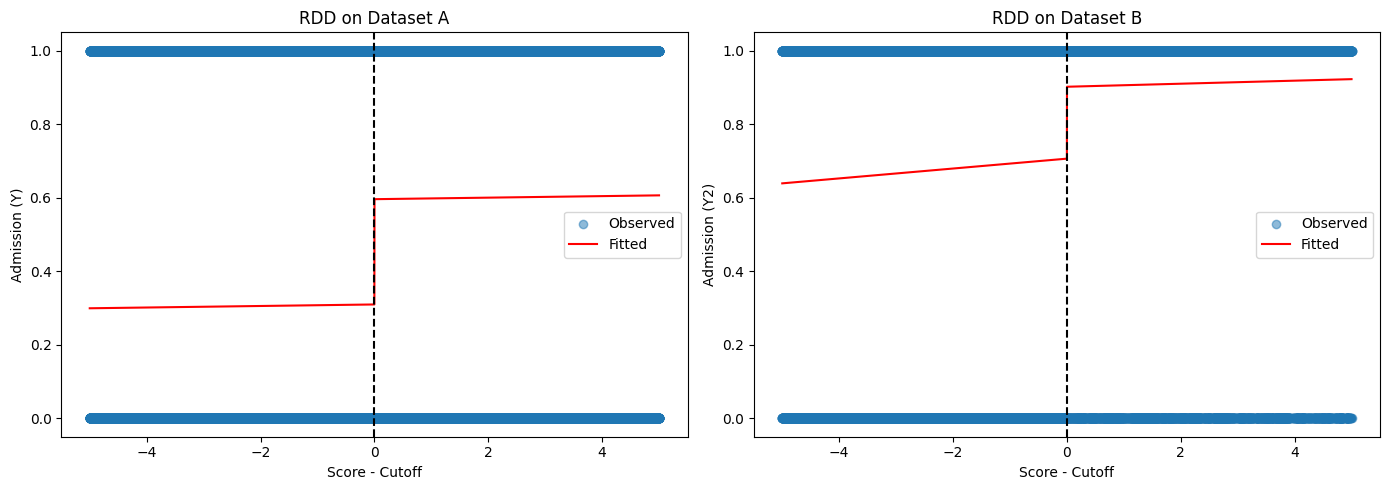

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load datasets
df_a = pd.read_csv("homework_4.2.a.csv")
df_b = pd.read_csv("homework_4.2.b.csv")

# Define a reusable RDD analysis function
def analyze_rdd(df, score_col, outcome_col, cutoff=80, bandwidth=5):
    df_band = df[(df[score_col] >= cutoff - bandwidth) & (df[score_col] <= cutoff + bandwidth)].copy()
    df_band['running'] = df_band[score_col] - cutoff
    df_band['treatment'] = (df_band['running'] >= 0).astype(int)
    model = smf.ols(f"{outcome_col} ~ running * treatment", data=df_band).fit()
    df_band = df_band.sort_values("running")
    df_band["predicted"] = model.predict(df_band)
    return df_band, model

# Apply RDD to both datasets
result_a, model_a = analyze_rdd(df_a, "X", "Y")
result_b, model_b = analyze_rdd(df_b, "X2", "Y2")

# Extract linear term coefficients and p-values
linear_term_a = model_a.params['running'], model_a.pvalues['running']
linear_term_b = model_b.params['running'], model_b.pvalues['running']

print("Dataset A (X, Y) - Linear term (running):")
print(f"  Coefficient: {linear_term_a[0]:.4f}")
print(f"  P-value: {linear_term_a[1]:.4f}\n")

print("Dataset B (X2, Y2) - Linear term (running):")
print(f"  Coefficient: {linear_term_b[0]:.4f}")
print(f"  P-value: {linear_term_b[1]:.4e}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(result_a["running"], result_a["Y"], alpha=0.5, label="Observed")
axes[0].plot(result_a["running"], result_a["predicted"], color='red', label="Fitted")
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title("RDD on Dataset A")
axes[0].set_xlabel("Score - Cutoff")
axes[0].set_ylabel("Admission (Y)")
axes[0].legend()

axes[1].scatter(result_b["running"], result_b["Y2"], alpha=0.5, label="Observed")
axes[1].plot(result_b["running"], result_b["predicted"], color='red', label="Fitted")
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title("RDD on Dataset B")
axes[1].set_xlabel("Score - Cutoff")
axes[1].set_ylabel("Admission (Y2)")
axes[1].legend()

plt.tight_layout()
plt.show()


In [8]:
# Extract coefficient for the 'running' term in Dataset B
running_coef_b = model_b.params['running']

# Determine direction
if running_coef_b > 0:
    print("Y is increasing before the cutoff (Option A).")
else:
    print("Y is decreasing before the cutoff (Option B).")


Y is increasing before the cutoff (Option A).


Dataset B (X2, Y2) - Linear term (running):
  Coefficient: 0.0134
  P-value: 3.8028e-12
✅ Y is increasing before the cutoff (Option A).


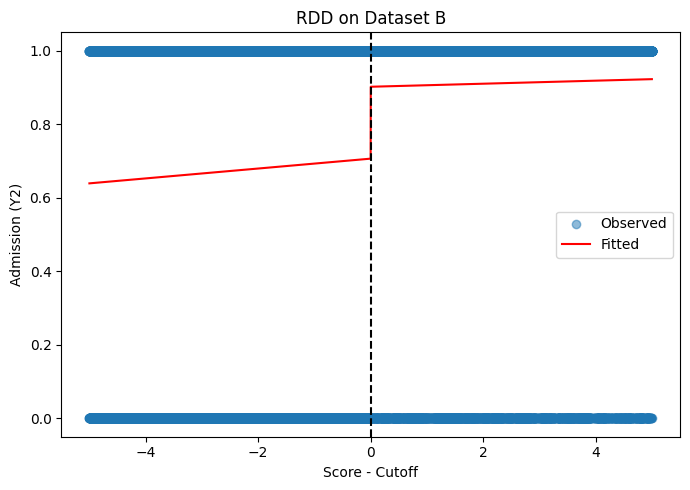

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load datasets
df_a = pd.read_csv("homework_4.2.a.csv")
df_b = pd.read_csv("homework_4.2.b.csv")

# Define a function for RDD analysis
def analyze_rdd(df, score_col, outcome_col, cutoff=80, bandwidth=5):
    df_band = df[(df[score_col] >= cutoff - bandwidth) & (df[score_col] <= cutoff + bandwidth)].copy()
    df_band['running'] = df_band[score_col] - cutoff
    df_band['treatment'] = (df_band['running'] >= 0).astype(int)
    model = smf.ols(f"{outcome_col} ~ running * treatment", data=df_band).fit()
    df_band = df_band.sort_values("running")
    df_band["predicted"] = model.predict(df_band)
    return df_band, model

# Run RDD on Dataset B
result_b, model_b = analyze_rdd(df_b, "X2", "Y2")

# Extract and interpret the running term
running_coef_b = model_b.params['running']
p_value_b = model_b.pvalues['running']

print("Dataset B (X2, Y2) - Linear term (running):")
print(f"  Coefficient: {running_coef_b:.4f}")
print(f"  P-value: {p_value_b:.4e}")

# Interpret direction
if running_coef_b > 0:
    print("✅ Y is increasing before the cutoff (Option A).")
else:
    print("✅ Y is decreasing before the cutoff (Option B).")

# Plotting
plt.figure(figsize=(7, 5))
plt.scatter(result_b["running"], result_b["Y2"], alpha=0.5, label="Observed")
plt.plot(result_b["running"], result_b["predicted"], color='red', label="Fitted")
plt.axvline(0, color='black', linestyle='--')
plt.title("RDD on Dataset B")
plt.xlabel("Score - Cutoff")
plt.ylabel("Admission (Y2)")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Extract pre- and post-cutoff slopes for Dataset B
# Before cutoff: slope = running
# After cutoff: slope = running + running:treatment

slope_before = model_b.params['running']
slope_after = model_b.params['running'] + model_b.params['running:treatment']

slope_before, slope_after


(np.float64(0.013441890897999652), np.float64(0.004131837578821506))

In [3]:
import numpy as np
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Set parameters
num = 1000
event_time = int(num / 2)  # 500

# Step 2: Simulate market returns with a slight trend
R_market = np.random.normal(0, 1, num) + np.arange(num) / num

# Step 3: Simulate target returns and inject an event at time 501
R_target = (
    2 + R_market + np.random.normal(0, 1, num) +
    (np.arange(num) == event_time + 1) * 2  # Add a jump of +2 at event_time+1
)

# Step 4: Fit regression on pre-event data
X = sm.add_constant(R_market[:event_time])
model = sm.OLS(R_target[:event_time], X).fit()

# Step 5: Get residuals across the full time period
resid = R_target - model.predict(sm.add_constant(R_market))

# Step 6: Compute the t-like statistic at event_time + 1
test_stat = resid[event_time + 1] / resid[:event_time].std(ddof=2)
print(f"t-like value at event_time + 1: {test_stat:.3f}")


t-like value at event_time + 1: 1.450


In [4]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

# Fix the random seed for reproducibility
np.random.seed(0)

# Set parameters
num = 1000
true_event_time = int(num / 2)

# Simulate fixed dataset with a real event at true_event_time + 1
R_market = np.random.normal(0, 1, num) + np.arange(num) / num
R_target = (
    2 + R_market + np.random.normal(0, 1, num) +
    (np.arange(num) == true_event_time + 1) * 2  # Inject +2 jump at the real event
)

# Placeholder to record detections in placebo tests
detections = []

# Perform placebo test at each time point (excluding early indices)
for placebo_event_time in range(100, num - 2):
    np.random.seed(0)  # Reset seed to ensure fixed dataset each time

    # Train OLS on data before the placebo event
    X = sm.add_constant(R_market[:placebo_event_time])
    model = sm.OLS(R_target[:placebo_event_time], X).fit()

    # Compute residuals
    resid = R_target - model.predict(sm.add_constant(R_market))

    # t-like statistic at placebo_event_time + 1
    t_value = resid[placebo_event_time + 1] / resid[:placebo_event_time].std(ddof=2)

    # Two-sided p-value
    p_value = 2 * (1 - norm.cdf(abs(t_value)))

    # Record detection if p < 0.05
    detections.append(p_value < 0.05)

# Compute false positive rate
false_positive_rate = np.mean(detections)
print(f"False positive rate from placebo tests: {false_positive_rate:.4f}")


False positive rate from placebo tests: 0.0457


In [5]:
import numpy as np
import statsmodels.api as sm

from scipy.stats import norm

# Function to perform one run of the placebo test
def run_placebo_test_with_local_window():
    np.random.seed()  # Use different seed for each run

    num = 1000
    true_event_time = int(num / 2)

    # Simulate new dataset with event at true_event_time + 1
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    R_target = (
        2 + R_market + np.random.normal(0, 1, num) +
        (np.arange(num) == true_event_time + 1) * 2  # Inject +2 jump at true event
    )

    # True event t-like value
    X_true = sm.add_constant(R_market[:true_event_time])
    model_true = sm.OLS(R_target[:true_event_time], X_true).fit()
    resid_true = R_target - model_true.predict(sm.add_constant(R_market))
    t_actual = resid_true[true_event_time + 1] / resid_true[:true_event_time].std(ddof=2)

    # Run placebo tests: 20 before and 20 after
    placebo_times = list(range(true_event_time - 20, true_event_time)) + \
                    list(range(true_event_time + 1, true_event_time + 21))

    t_placebo = []
    for pt in placebo_times:
        X = sm.add_constant(R_market[:pt])
        model = sm.OLS(R_target[:pt], X).fit()
        resid = R_target - model.predict(sm.add_constant(R_market))
        t_val = resid[pt + 1] / resid[:pt].std(ddof=2)
        t_placebo.append(t_val)

    # Fraction of placebo t-values > true event t-value
    return np.mean(np.array(t_placebo) > t_actual)

# Run simulation multiple times
results = [run_placebo_test_with_local_window() for _ in range(100)]
average_fraction = np.mean(results)

print(f"Average fraction of placebo t-values greater than actual: {average_fraction:.4f}")


Average fraction of placebo t-values greater than actual: 0.0740
